# Optimización del Rendimiento del Equipo B en League of Legends: Análisis y Estrategias

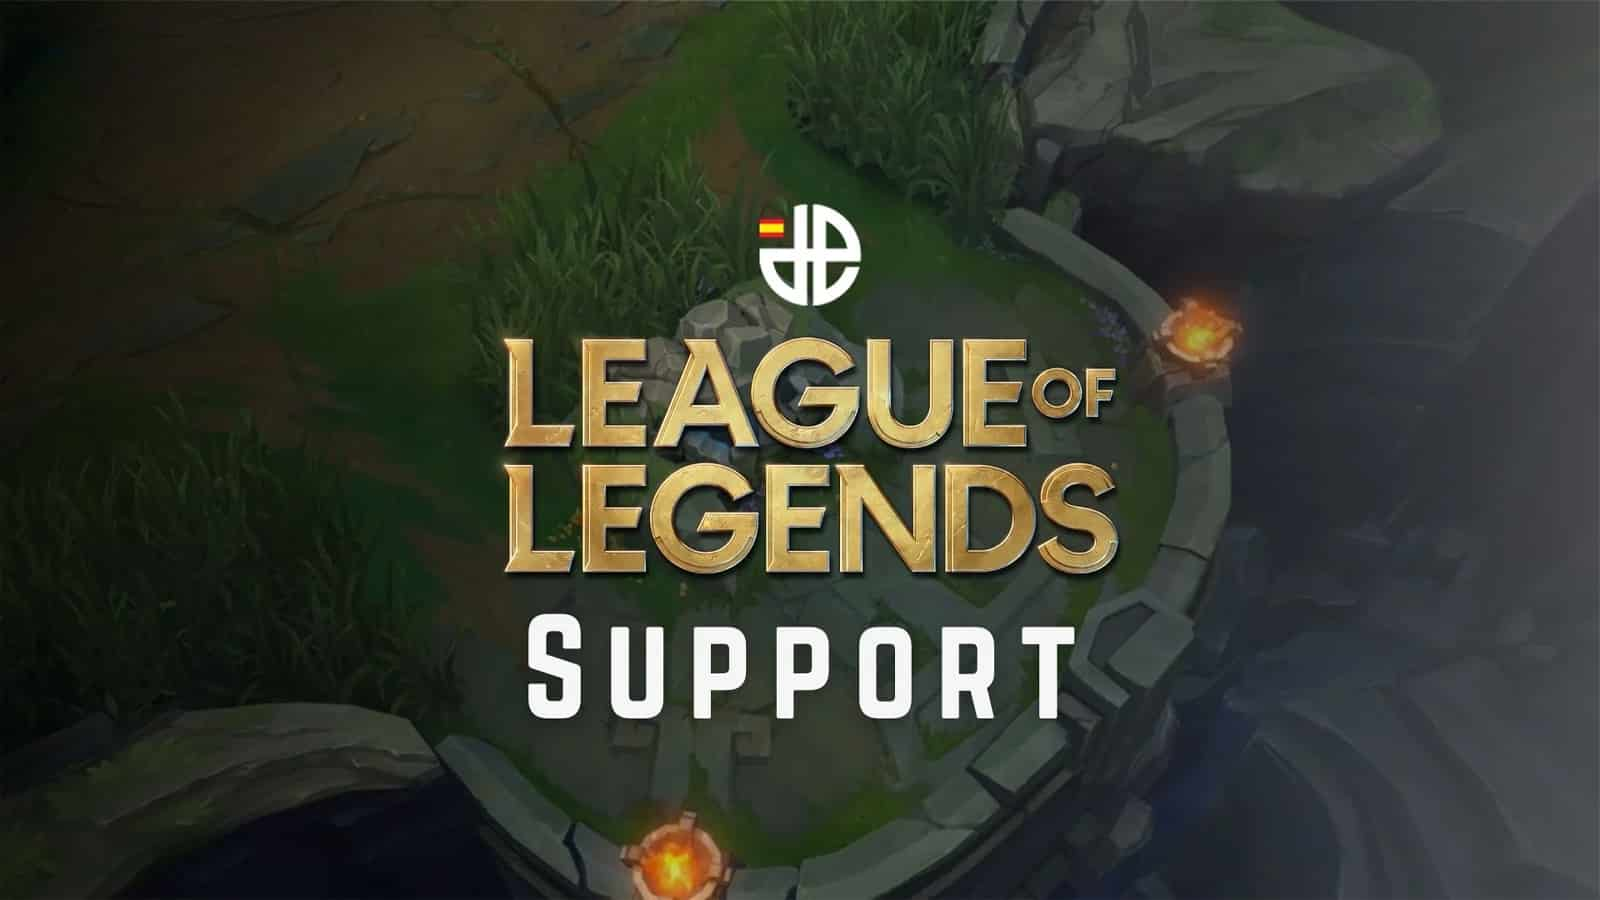

## ¿Que es League of Legends?
League of Legends es un juego de estrategia por equipos en el que dos equipos conformados por cinco poderosos campeones se enfrentan para destruir la base del otro. Elige de entre más de 140 campeones para realizar jugadas épicas, asegurar asesinatos y destruir torretas mientras avanzas hacia la victoria.

[leagueoflegends.com](https://www.leagueoflegends.com/es-mx/how-to-play/#:~:text=League%20of%20Legends%20es%20un,mientras%20avanzas%20hacia%20la%20victoria.)

## Entregas:
- [Estructurando un Proyecto de DS (parte I)](https://colab.research.google.com/drive/1G7wMNy01128QyQWhwtiqmbYVyn0P6oXc?usp=sharing)
- [Estructurando un Proyecto de DS (parte II)](https://colab.research.google.com/drive/1CxvFrQcTOIh3wmUbl4gih06AwiSWPNoJ?usp=sharing)
- [Estructurando un Proyecto de DS (parte III)](https://colab.research.google.com/drive/1M4J6HB_xypanCYMht3p4mJDoo15npx6X?usp=sharing)

In [ ]:
# Instalacion de libreria necesarias
! pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
import pandas as pd

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download'
od.download(dataset_url)

Skipping, found downloaded files in "./league-of-legends-diamond-ranked-games-10-min" (use force=True to force download)


In [ ]:
df = pd.read_csv("/content/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

## Consigna:
- Generar una evaluación de modelos apropiados para el problema de interés.
- Identificar por medio de las métricas generadas si se puede tener una situación de overfitting (sobreajuste) o underfitting (subajuste), discutiendo posibles formas de mejora.


In [ ]:
# Importacion de Plotly como libreria de DataViz
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statsmodels.api as sm

## EDA - Etapa III

In [ ]:
droppedVariables = ["gameId", "blueFirstBlood", "blueEliteMonsters", "blueTotalGold", "blueTotalExperience", "blueTotalMinionsKilled", "blueTotalJungleMinionsKilled", "blueCSPerMin", "blueGoldPerMin", "redFirstBlood", "redKills", "redDeaths", "redAssists", "redEliteMonsters", "redTotalGold", "redTotalExperience", "redTotalMinionsKilled", "redTotalJungleMinionsKilled", "redGoldDiff", "redExperienceDiff", "redCSPerMin", "redGoldPerMin"]
plot_variables = ["blueKills", "blueAssists", "blueDeaths", "blueWardsPlaced", "blueWardsDestroyed", "blueGoldDiff", "blueExperienceDiff"]
dataCleaned = df.drop(droppedVariables, axis = 1)

## Aplicacion de Moldelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
selected_features = df[plot_variables]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [ ]:
def model_train_test(model, xts, xTest, yTrain, yTest):
    model.fit(xts, yTrain)
    y_predict = model.predict(xTest)
    print(classification_report(yTest, y_predict))
    ConfusionMatrixDisplay.from_estimator(model, xTest, yTest)

### Aplicar K-nn

In [ ]:
X = dataCleaned.drop("blueWins", axis = 1)
y = dataCleaned["blueWins"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       990
           1       0.71      0.63      0.67       986

    accuracy                           0.69      1976
   macro avg       0.69      0.69      0.69      1976
weighted avg       0.69      0.69      0.69      1976



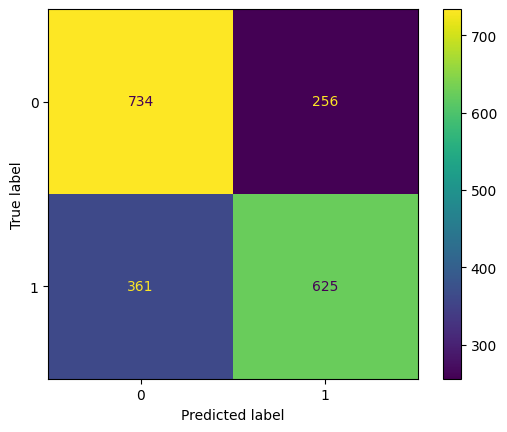

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
model_train_test(knn, X_train_scaled, X_test_scaled, y_train, y_test)

### Aplicar PCA

In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2', 'Componente 3'])

In [ ]:
df_pca = pd.concat([df[['blueWins']], pca_df], axis=1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       993

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



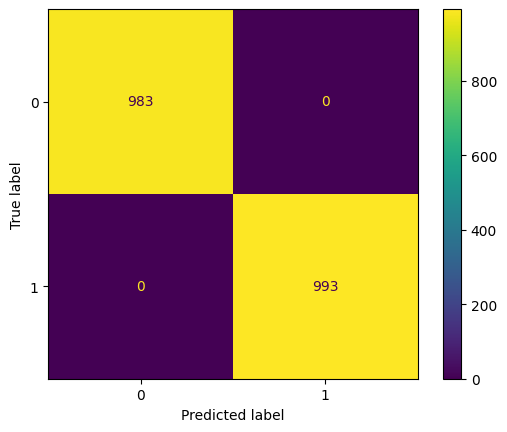

In [ ]:
model_train_test(knn, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)
KNNClassifier.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
def distance(p1, p2):
  x_diff_squared = (p1[0] - p2[0]) ** 2
  y_diff_squared = (p1[1] - p2[1]) ** 2
  return (x_diff_squared + y_diff_squared) ** 0.5

distance( (0, 0), (3, 4) )      # => 5.0


5.0

## Resumen:
Los resultados indican que el modelo PCA-KNN ha obtenido un rendimiento sobresaliente con una precisión, recall y F1-score perfectos de 1.00 en ambas clases. Esto sugiere que el modelo PCA-KNN es capaz de predecir con alta precisión tanto las victorias como las derrotas. Por otro lado, el modelo KNN muestra un rendimiento sólido con una precisión, recall y F1-score promedio de aproximadamente 0.69. Sin embargo, la matriz de confusión para el modelo KNN muestra un número considerable de falsos positivos y falsos negativos, lo que indica cierta dificultad en la distinción precisa entre las clases.

## Pasos para Mejorar y Avanzar en el Análisis:

- **Validación Cruzada y Ajuste de Hiperparámetros para PCA-KNN**: Implementar la validación cruzada K-Fold en el modelo PCA-KNN para evaluar su capacidad de generalización en diferentes conjuntos de datos.
Ajustar los hiperparámetros del modelo PCA-KNN, como el número de componentes principales y el número de vecinos en KNN, para optimizar el rendimiento y prevenir el overfitting.

- **Explorar Otros Algoritmos y Técnicas**: Investigar otros algoritmos de clasificación, como Support Vector Machines, Random Forest y Gradient Boosting, para comparar su rendimiento con el PCA-KNN y el KNN tradicional.
Explorar técnicas de reducción de dimensionalidad alternativas, como LDA (Análisis Discriminante Lineal), y evaluar cómo afectan al rendimiento del modelo.

- **Mejora del Modelo KNN**: Realizar un análisis exhaustivo de los hiperparámetros del modelo KNN, como el número de vecinos y la métrica de distancia, para lograr un equilibrio óptimo entre precisión y recall.
Experimentar con diferentes estrategias de normalización o escalado de características para mejorar la capacidad de predicción del KNN.